# Expectation, the Law of Large Numbers, and the Central Limit Theorem
Let's explore two fundamental ideas in probability: the **law of large numbers** and the **central limit theorem**. These experiments will impart some intuition around the notion of expectation, as well as understand why the Gaussian distribution shows up so often in statistical signal processing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, we'll look at empirical averages of samples from a few different distributions, and we'll see that they converges on the "correct" average $E[X]$. Try it for a few different sample sizes -- the larger the sample size, the closer we'll usually be to the correct mean.

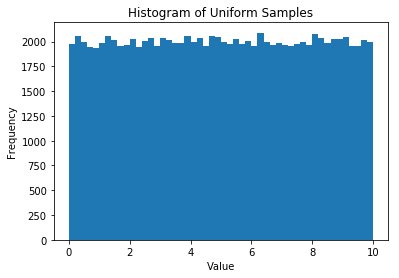

5.00235722186


In [3]:
NUMBER_OF_SAMPLES = 100000

unifSamples = np.random.uniform(0,10,NUMBER_OF_SAMPLES)
unifAverage = np.mean(unifSamples)
plt.hist(unifSamples,50)
plt.title("Histogram of Uniform Samples")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
print(unifAverage)


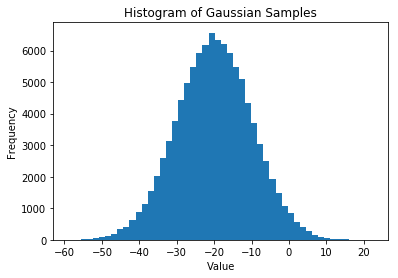

-19.9986426426


In [9]:
NUMBER_OF_SAMPLES = 100000

gaussianSamples = np.random.normal(-20,10,NUMBER_OF_SAMPLES)
gaussianAverage = np.mean(gaussianSamples)
plt.hist(gaussianSamples,50)
plt.title("Histogram of Gaussian Samples")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()
print(gaussianAverage)

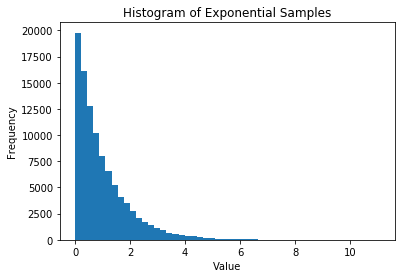

0.997522984923


In [12]:
NUMBER_OF_SAMPLES = 100000

expSamples = np.random.exponential(1,NUMBER_OF_SAMPLES)
expAverage = np.mean(expSamples)
plt.hist(expSamples,50)
plt.title("Histogram of Exponential Samples")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()
print(expAverage)

The guts of the LLN are simple enough. With enough samples, the histogram looks like the distribution $p(x)$ and the sample average is close to $E[X]$. But *how fast* does the sample average converge? The __central limit theorem__ is a classic result in statistics that provides the answer: With more and more samples, the sample average looks like a Gaussian whose mean is $E[X]$ and whose variance is proportional to $1/n$.

To see this, we'll plot the *histogram* of the *sample average*. This requires an outer loop, over instantiations of the sample average, and an inner loop to compute the sample averages themselves. We'll try out the uniform distribution first.

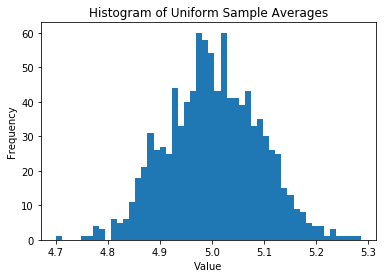

0.00783738427326


In [8]:
NUMBER_OF_SAMPLE_AVERAGES = 1000
NUMBER_OF_SAMPLES = 1000

unifSamples = np.random.uniform(0,10, [NUMBER_OF_SAMPLE_AVERAGES, NUMBER_OF_SAMPLES])
unifAverages = np.mean(unifSamples,1) #compute multiple sample means
unifVariance = np.mean((unifAverages - 5)**2)

plt.hist(unifAverages,50)
plt.title("Histogram of Uniform Sample Averages")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

print(unifVariance)

The more samples we use, the closer this becomes to a Gaussian distribution. This is a pretty remarkable result, since we started with uniform random variables, not Gaussian ones! This result, called the **central limit theorem**, holds for a rather general family of distributions. Let's try it for the exponential distribution next.

In [ ]:
NUMBER_OF_SAMPLE_AVERAGES = 10000
NUMBER_OF_SAMPLES = 1000

expSamples = np.random.exponential(1, [NUMBER_OF_SAMPLE_AVERAGES, NUMBER_OF_SAMPLES])#[[random.uniform(0,10) for p in range(0,NUMBER_OF_SAMPLES)] for q in range(0,NUMBER_OF_SAMPLE_AVERAGES)] #sample from the continuous uniform distribution over [0,10]
expAverages = np.mean(expSamples,1) #compute multiple sample averages
expVariance = np.mean((expAverages - 1)**2) #estimate the variance of the sample average error

plt.hist(expAverages,50)
plt.title("Histogram of Exponential Sample Averages")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()
print(expVariance)

The central limit theorem is why Gaussians are ubiquitious in statistics and signal processing. Any phenomenon that is the sum of many small factors, regardless of their distribution, will have a near-Gaussian distribution. As a result, we'll often just suppose that a Gaussian model is appropriate without bothering with a detailed justification. Sometimes this gets us in trouble, but it's usually a decent starting point.

The CLT is a also statement about how well we can estimate the mean. If we estimate the mean as the average of $n$ i.i.d. samples, the CLT says that our estimation error is approximately a Gaussian random variable with a variance of about $1/n$. This simple result has far-reaching implications. Towards the end of the course, we'll show that, given $n$ i.i.d. samples from a distribution, one can estimate virtually *any* function of that data---such as the position of a target---with estimation error having variance that scales as $1/n$. We'll look at this in an estimation context later in the semester.